In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import os
from dotenv import load_dotenv

In [16]:
load_dotenv()
csv_path = os.getenv("PATHD")

dataset = pd.read_csv(csv_path)

df = dataset.copy()

In [17]:
df.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,...,Quantity,Discount,Profit,Order Year,Order Month,Order Day,Order Month(N),CLV,Delivery Time (days),Ship Day
0,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,...,2,0.00,41.9136,2016,11,Tue,November,3146.243079,3,Fri
1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,...,3,0.00,219.5820,2016,11,Tue,November,3146.243079,3,Fri
2,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,...,2,0.00,6.8714,2016,6,Sun,June,3066.005363,4,Thu
3,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,...,5,0.45,-383.0310,2015,10,Sun,October,7127.853161,7,Sun
4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,...,2,0.20,2.5164,2015,10,Sun,October,7127.853161,7,Sun


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9993 entries, 0 to 9992
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Order ID              9993 non-null   object 
 1   Order Date            9993 non-null   object 
 2   Ship Date             9993 non-null   object 
 3   Ship Mode             9993 non-null   object 
 4   Customer ID           9993 non-null   object 
 5   Customer Name         9993 non-null   object 
 6   Segment               9993 non-null   object 
 7   Country               9993 non-null   object 
 8   City                  9993 non-null   object 
 9   State                 9993 non-null   object 
 10  Postal Code           9993 non-null   int64  
 11  Region                9993 non-null   object 
 12  Product ID            9993 non-null   object 
 13  Category              9993 non-null   object 
 14  Sub-Category          9993 non-null   object 
 15  Product Name         

In [31]:
df.columns

Index(['Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID',
       'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name',
       'Sales', 'Quantity', 'Discount', 'Profit', 'Order Year', 'Order Month',
       'Order Day', 'Order Month(N)', 'CLV', 'Delivery Time (days)',
       'Ship Day'],
      dtype='object')

<Axes: >

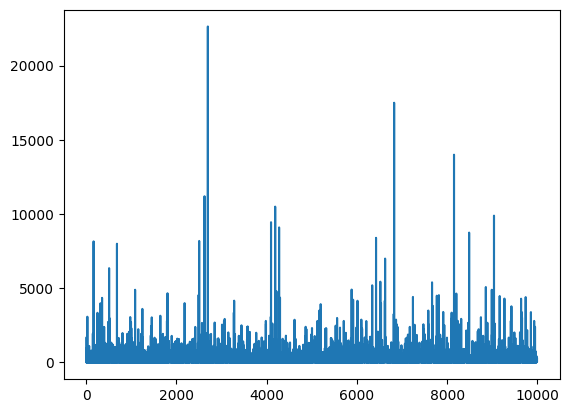

In [19]:
df['Sales'].plot()

In [20]:
df['Order Date'] = pd.to_datetime(df['Order Date'])

In [29]:
df['Order Date'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 9993 entries, 0 to 9992
Series name: Order Date
Non-Null Count  Dtype         
--------------  -----         
9993 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 78.2 KB


In [32]:
def get_sales_by_timeframe(data):
	"""
	Aggregates sales data by months and years. 

	Parameters:
	data (pd.Dataframe): A Dataset contains 'Order Date' and 'Sales' columns. 

	Returns: 
	Tuple: Two dataframes - one aggregated by months and another aggregated by years. 

	"""
	if not pd.api.types.is_datetime64_any_dtype(data['Order Date']):
		data['Order Date'] = pd.to_datetime(data['Order Date'])

	monthly_data = data.copy()
	monthly_data['Order Date'] = monthly_data['Order Date'].dt.to_period('M').dt.to_timestamp() # start of Month
	monthly_agg = monthly_data.groupby('Order Date', observed = True)['Sales'].sum().reset_index()

	yearly_data = data.copy()
	yearly_data['Order Date'] = yearly_data['Order Date'].dt.to_period('Y').dt.to_timestamp() # Start of the year
	yearly_agg = yearly_data.groupby('Order Date',observed=True)['Sales'].sum().reset_index()

	return monthly_agg, yearly_agg

In [33]:
monthly_sales , yearly_sales = get_sales_by_timeframe(df)


In [36]:
monthly_sales.head()

,Order Date,Sales
0,2014-01-01,14236.895
1,2014-02-01,4519.892
2,2014-03-01,55691.009
3,2014-04-01,28013.973
4,2014-05-01,23648.287


In [37]:
yearly_sales

,Order Date,Sales
0,2014-01-01,483966.1261
1,2015-01-01,470532.5090
2,2016-01-01,609205.5980
3,2017-01-01,733215.2552


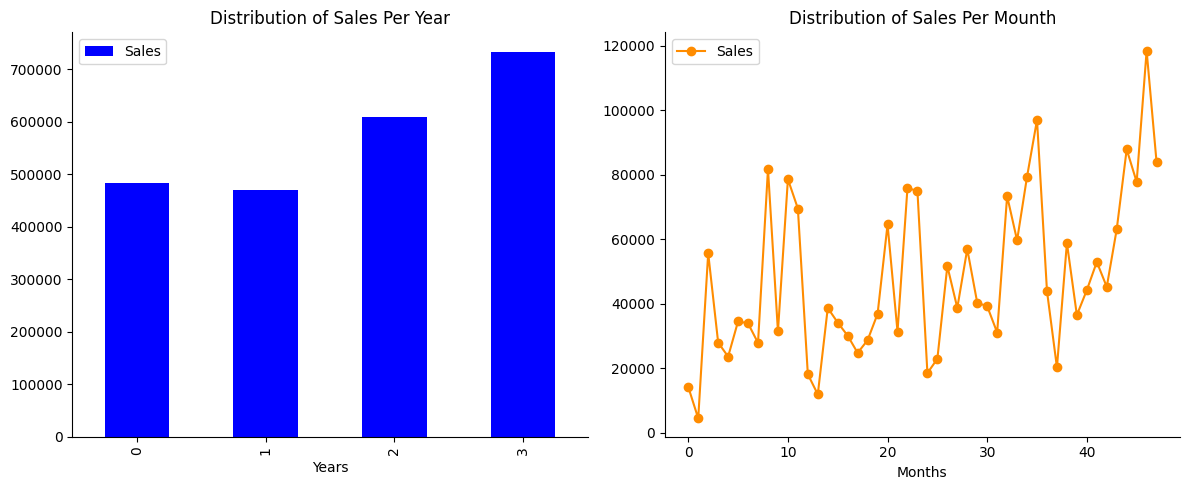

In [42]:
layout = (1,2)

raw = plt.subplot2grid(layout, (0,0))
law = plt.subplot2grid(layout, 
					   (0,1))

years = yearly_sales['Sales'].plot(kind='bar', color='Blue', label='Sales', ax=raw, figsize=(12,5))
months = monthly_sales["Sales"].plot(marker="o", color="darkorange", label="Sales", ax=law)

years.set(xlabel="Years", title="Distribution of Sales Per Year")
months.set(xlabel="Months", title="Distribution of Sales Per Mounth")

sns.despine()
plt.tight_layout()

years.legend()
months.legend()

In [50]:
def sales_time(data):
	"""
	Time interval of datset

	"""

	n_of_days = data['Order Date'].max() - data['Order Date'].min()
	n_of_years = data['Order Date'].dt.year.nunique()

	print(f"Days: {n_of_days.days}\nYears:{n_of_years}\nMonth: {12 * n_of_years}")

sales_time(df)

Days: 1457
Years:4
Month: 48


In [66]:
def sales_per_region(data):
	sales_by_region = data.groupby('Region',observed=True)['Sales'].sum().reset_index()
	sales_by_region = sales_by_region.sort_values(by="Sales", ascending=False)

	fig,ax = plt.subplots(figsize=(8,6))

	sns.barplot(
		x="Region", 
		y="Sales", 
		data=sales_by_region, 
		hue="Region",  # Assign the x variable to hue
		dodge=False,   # Ensure bars are not split
		palette="viridis" 
	)
	
	ax.set(xlabel = "Region", ylabel = "Sum of Sales", title = "Total Sales Per Regio")  

	return sales_by_region

,Region,Sales
3,West,725457.8245
1,East,678499.8680
0,Central,501239.8908
2,South,391721.9050


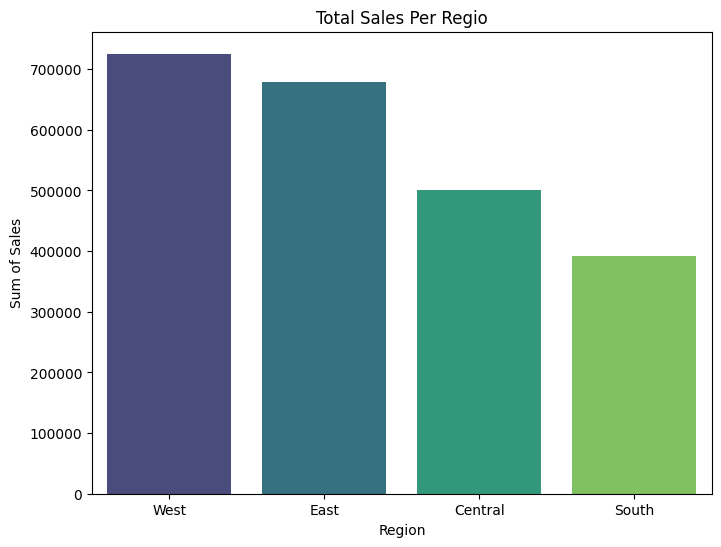

In [67]:
sales_per_region(df)

In [72]:
# Overall for four years: 

avg_m_sales = monthly_sales.Sales.mean()
print(f"Overall Average Monthly Sales: ${avg_m_sales}")

def avg_12months():
	# Last one year (This will be forecasted Sales)
	avg_m_sales_1y = monthly_sales.Sales[-12:].mean()
	print(f"Last 12 months average monthly sales: ${avg_m_sales_1y}")

avg_12months()	

Overall Average Monthly Sales: $47852.48933958334
Last 12 months average monthly sales: $61101.271266666656


# Determining Time Series Stationary

The idea is to analyze the trend and seasonality patterns in the time series, then remove these components to create a stationary series. A stationary series, which has constant mean and variance, is more suitable for applying statistical forecasting methods. Once predictions are made on the stationary series, the trend and seasonality components are reintroduced to transform the forecasted values back to their original scale.This approach ensures the final predictions reflect both the underlying patterns and the random fluctuations in the data. 

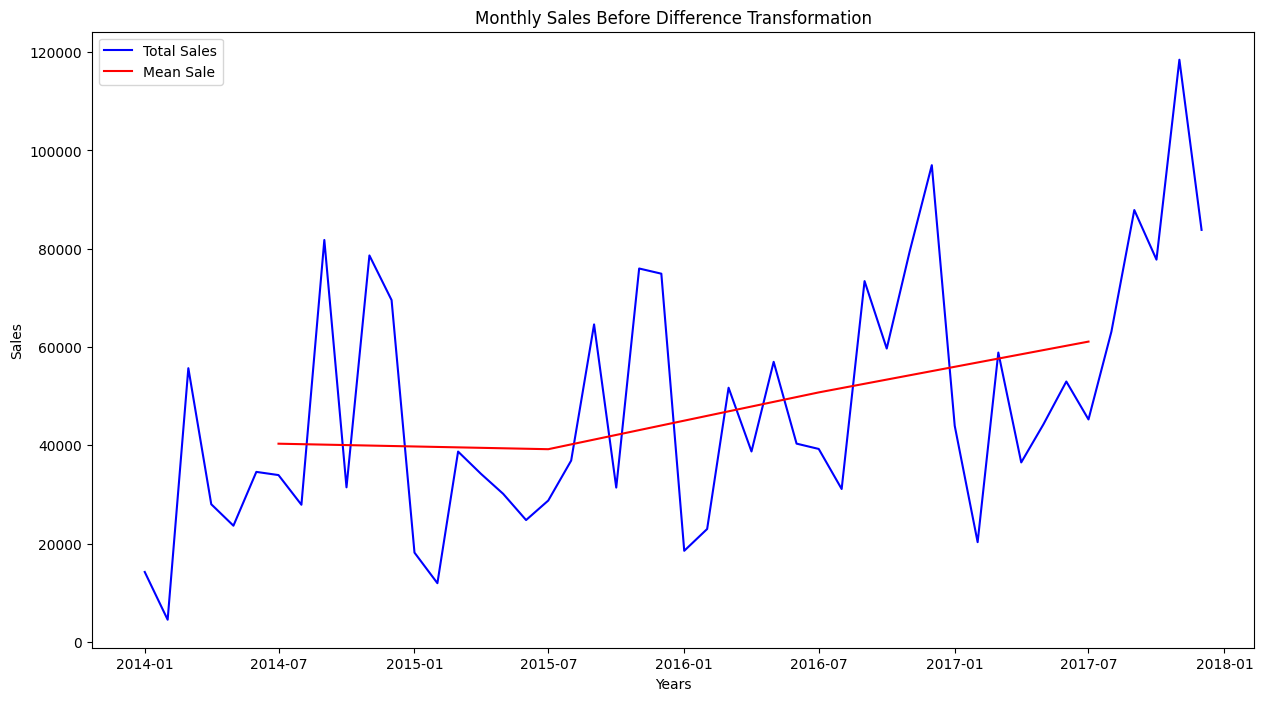

In [78]:
def time_plot(data, x_col, y_col, title):
	fig, ax = plt.subplots(figsize = (15,8))

	sns.lineplot(x=x_col, y=y_col, data=data, ax=ax, color='blue', label='Total Sales')
	s_mean = data.groupby(data[x_col].dt.year, observed=True)[y_col].mean().reset_index()
	s_mean[x_col] = pd.to_datetime(s_mean[x_col], format='%Y')

	sns.lineplot(
		x=(s_mean[x_col] + pd.DateOffset(months=6)),
		y=s_mean[y_col],
		ax=ax,
		color='red',
		label='Mean Sale'
	)

	ax.set(
		xlabel="Years",
		ylabel="Sales",
		title=title
	)

	plt.legend()
	plt.show()

time_plot(monthly_sales, 'Order Date', 'Sales', 'Monthly Sales Before Difference Transformation')	

The original series shows a clear upward trend

# Differencing 
We will compute the difference between consecutive values in the series. This process, called differencing, is commonly used to remove a changing mean from the data.
* Differencing is a technique used in time series analysis to make a non-stationary series(ine with trnds or changing averages) more stationary (constant mean and variance over time). 


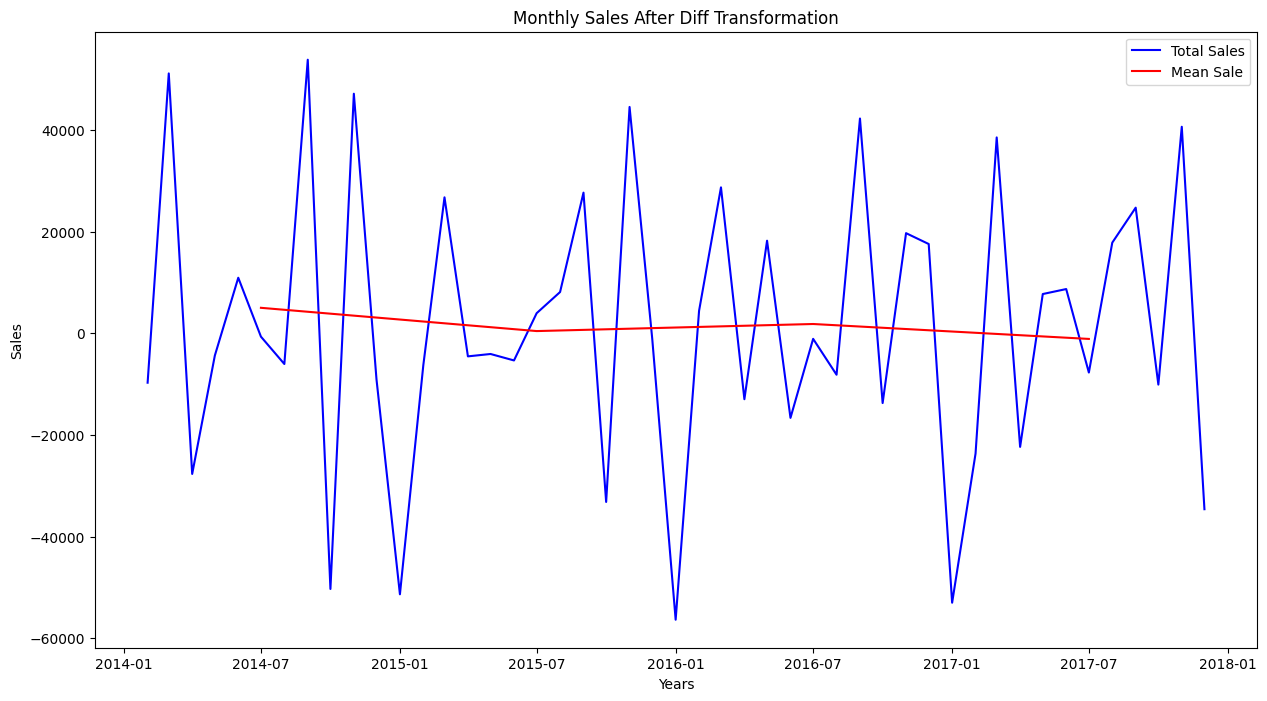

In [79]:
def calculate_monthly_difference(
    data, column="Sales", output_file="./stationary_df.csv"
):
    """Calculate month-over-month difference for a specified column in the dataset.
	   Parameters:
	   		data (pd.DataFrame): The input dataset
			column (str): The column for which to calculate the difference (default is 'sales')
			output_file (str): The file path to save the transformed dataset as a CSV file.

		Returns:
			pd.DataFrames: The dataset with the calculated difference column and NaN values dropped.	
	"""

    data[f'{column}_diff'] = data[column].diff()

    transformed_data = data.dropna()
    transformed_data.to_csv(output_file, index=False)

    return transformed_data


stationary_df = calculate_monthly_difference(monthly_sales, column='Sales')

time_plot(stationary_df, 'Order Date', 'Sales_diff', 'Monthly Sales After Diff Transformation')

Total Sale shows considerable spiked and dips, highlighting months with significant changes in sales. This suggests even after removing the trend, the series contains irregular patterns that could be due to seasionality or random fluctuations. 

Now we will prepare the data for different types of models, ensuring it represents monthly sales and has been transformed into a stationary format. 
* One structure will be designed specifically for ARIMA modeling, while the other will be used for all the remaining models.  

# ARIMA Modeling

In [93]:
def prepare_arima_data(data, output_path='./arima_df.csv'):
	"""
		Prepares a Dataframe for ARIMA modeling by setting a datetime index and keeping the dependent variable.
		Saves the prepared DataFrame as a CSV file. 
	"""

	arima_data = data[['Order Date', 'Sales_diff']].dropna().set_index('Order Date')

	arima_data.to_csv(output_path)

	return arima_data
	

arima_df = prepare_arima_data(stationary_df)
arima_df.head(5)

,Sales_diff
Order Date,
2014-02-01,-9717.0030
2014-03-01,51171.1170
2014-04-01,-27677.0360
2014-05-01,-4365.6860
2014-06-01,10946.8406


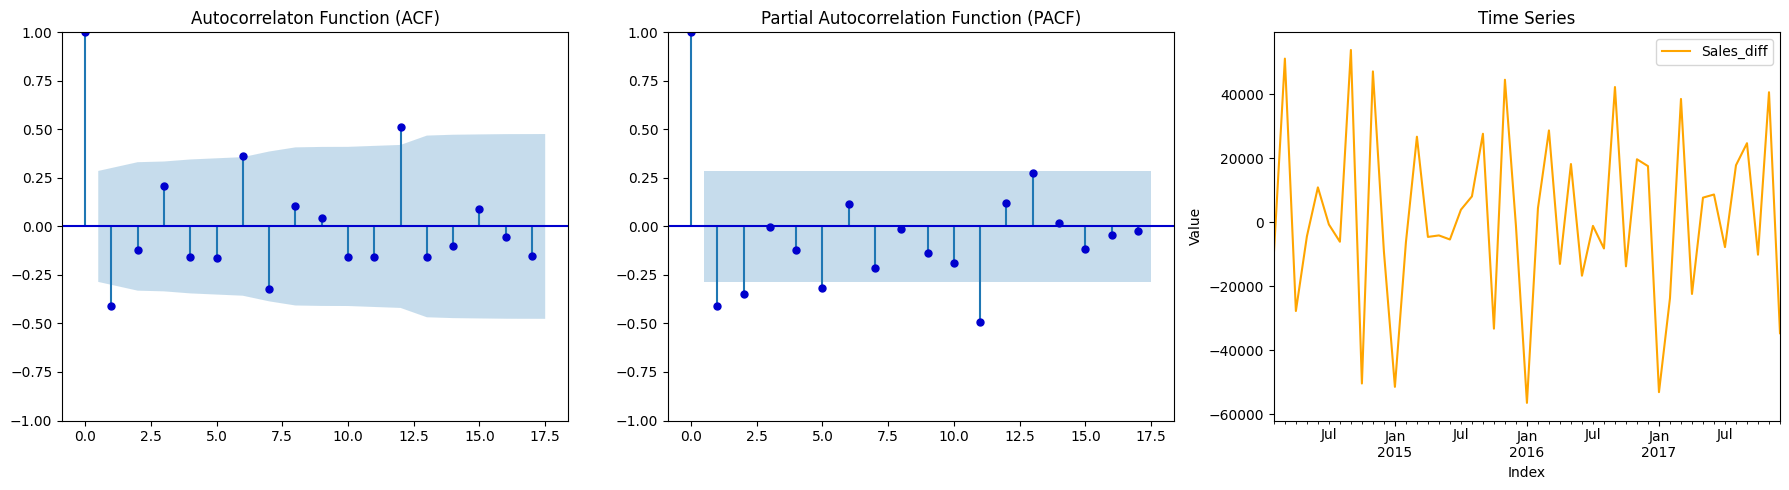

In [110]:
import statsmodels.graphics.tsaplots as smt

def plot_lags_alternative(data, lags=None):
	"""Plot time series, ACF, and PCAF with specified lags. 
	Parameters:
	-----------
	data : pandas.DataFrame
		Input DataFrame with time series data
	lags : int, optional
		Number of lags to plpt. If None, defaults to min(10, len(data)//2)
    """

	dt_data = data.set_index('Order Date').drop('Sales', axis=1).dropna()
	
	fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 5))

	smt.plot_acf(dt_data, lags=lags, ax=ax1, color='mediumblue')
	ax1.set_title('Autocorrelaton Function (ACF)')

	smt.plot_pacf(dt_data, lags=lags, ax=ax2, color='mediumblue')
	ax2.set_title('Partial Autocorrelation Function (PACF)')

	dt_data.plot(ax=ax3, color='orange', title="Time Series")
	ax3.set_xlabel('Index')
	ax3.set_ylabel('Value')
	
	plt.tight_layout()
	plt.show()

plot_lags_alternative(stationary_df)	

# Regressive Modeling

In [ ]:
def prepare_supervised_data(data):
	supervised_df = data.copy()

	for i in range(1,1)


# Feature Extraction

In [32]:
df['Profit Margin'] = df['Profit']/df['Sales']
df['Discounted Profit'] = df['Profit']-df['Profit']*df['Discount']
df['Discount Percentage'] = df['Discount']/df['Sales']*100
df['Operating Expenses'] = df['Sales'] - df['Profit']
df['Net Profit'] = df['Profit'] - df['Discount']

In [33]:
data_columns = ['Order Date', 'Ship Date']
for col in data_columns:
    df[col] = pd.to_datetime(df[col])

In [35]:
df['Order Weekday'] = df['Order Date'].dt.dayofweek
df['Ship Year'] = df['Ship Date'].dt.year
df['Ship Month'] = df['Ship Date'].dt.month
df['Ship Weekday'] = df['Ship Date'].dt.dayofweek
df.drop(['Order Date','Ship Date'],axis=1,inplace=True)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9993 entries, 0 to 9992
Data columns (total 34 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Order ID              9993 non-null   object 
 1   Ship Mode             9993 non-null   object 
 2   Customer ID           9993 non-null   object 
 3   Customer Name         9993 non-null   object 
 4   Segment               9993 non-null   object 
 5   Country               9993 non-null   object 
 6   City                  9993 non-null   object 
 7   State                 9993 non-null   object 
 8   Postal Code           9993 non-null   int64  
 9   Region                9993 non-null   object 
 10  Product ID            9993 non-null   object 
 11  Category              9993 non-null   object 
 12  Sub-Category          9993 non-null   object 
 13  Product Name          9993 non-null   object 
 14  Sales                 9993 non-null   float64
 15  Quantity             

In [36]:
df.drop(['Order ID','Customer Name', 'Customer ID'],axis=1,inplace=True)

# Categorical Encoding 

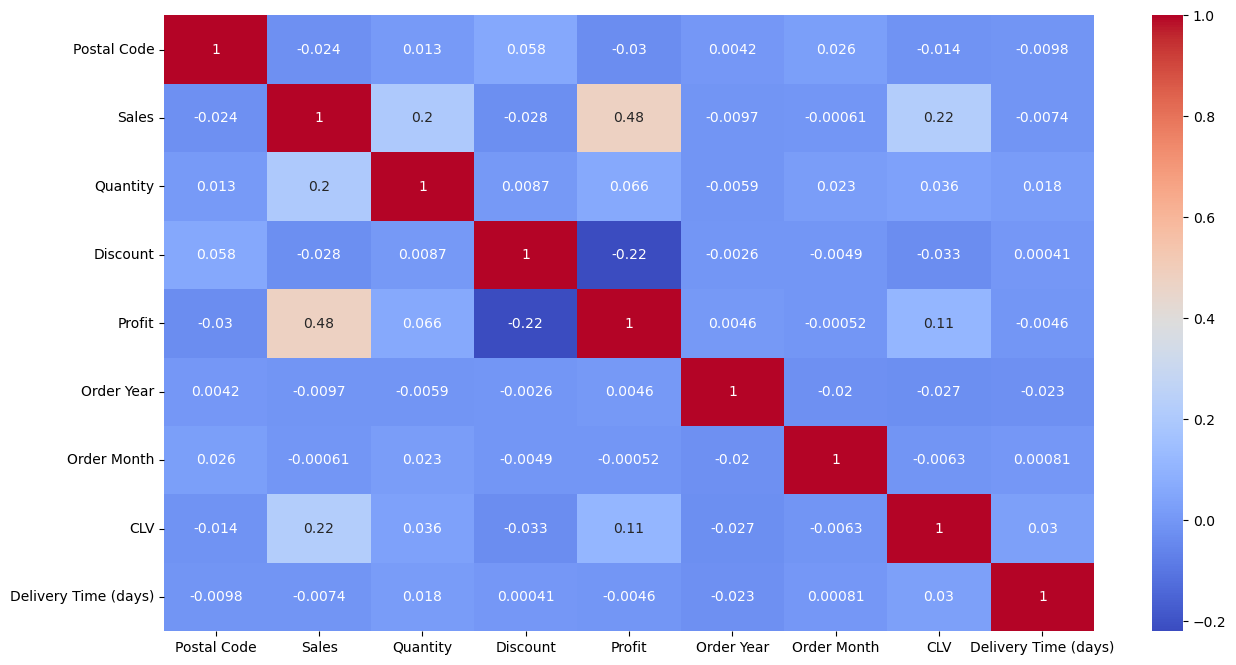

In [6]:
corr_matrix = df.select_dtypes(include=['float64', 'int64']).corr()

plt.figure(figsize=(15, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

## Sales 

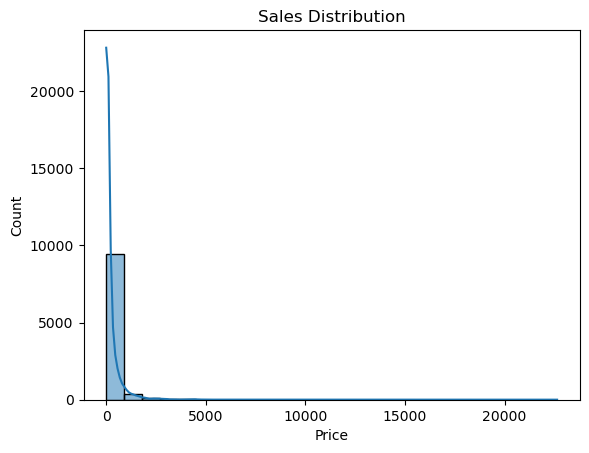

In [19]:
sns.histplot(df["Sales"], bins=25,kde=True)
plt.title("Sales Distribution")
plt.xlabel("Price")
plt.show()

Most of the data points are clustered on the lower end, there are a few extreme values (outliers) on the higher end that significantly pulling the distribution to the right. This is a common characteristics for data like sales, where a small number of customers might make exceptionally large purchases, leading to high values that skew the distribution. 





We are going to apply logarithmic transformation 

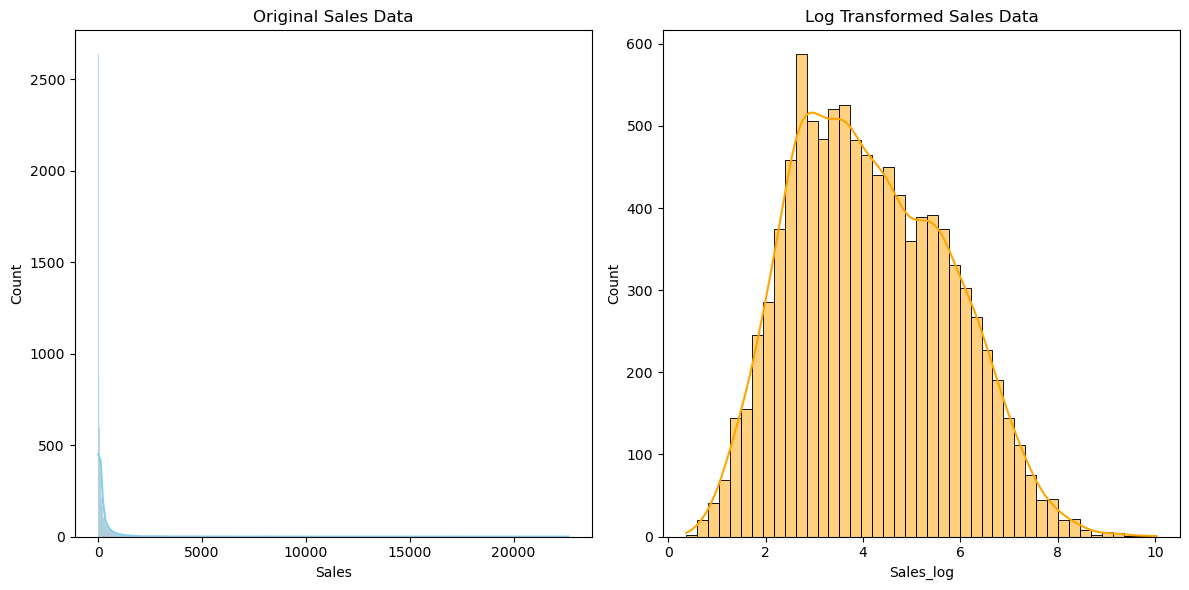

In [23]:
df['Sales_log'] = np.log1p(df['Sales'])

plt.figure(figsize=(12, 6))

# Before transformation
plt.subplot(1, 2, 1)
sns.histplot(df['Sales'], kde=True, color='skyblue')
plt.title('Original Sales Data')

# After transformation
plt.subplot(1, 2, 2)
sns.histplot(df['Sales_log'], kde=True, color='orange')
plt.title('Log Transformed Sales Data')

plt.tight_layout()
plt.show()